# Sentence length

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Get the list of all csv files
files = glob.glob("/kaggle/input/24-parallel-food-safety-regulations/*.csv")

# Initialize a dict to store lengths
sentence_lengths = {}

# Iterate over all files
for file in files:
    # Get language code from the filename
    language_code = file.split('/')[-1].split(' ')[0].split('-')[1]

    # Load the CSV file
    df = pd.read_csv(file)

    # Calculate the sentence lengths for English and the other language
    sentence_lengths[language_code] = {
        'EN': df['EN'].str.len(),
        'Other': df[language_code].str.len()
    }

# Initialize a plot with larger size
fig, ax = plt.subplots(figsize=(15, 8))

# Set the colors for the boxes
colors = ['yellow', 'blue']  # Yellow for English and Blue for Other Language

# Set flier properties
flierprops = dict(marker='o', markersize=4)  # Use a smaller size for the markers

# Iterate over sentence lengths
for i, (language, lengths) in enumerate(sentence_lengths.items()):
    # Plot the sentence lengths
    bp = ax.boxplot([lengths['EN'], lengths['Other']], positions=[i*3, i*3+1], notch=True, patch_artist=True, widths=0.6, flierprops=flierprops)
    
    # Change color and linewidth of the boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_linewidth(0.8)

# Set the x-ticks
ax.set_xticks([i*3+0.5 for i in range(len(sentence_lengths))])
ax.set_xticklabels(sentence_lengths.keys())

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add legend in a different location so it doesn't cover the labels
ax.legend([bp["boxes"][0], bp["boxes"][1]], ['English', 'Other'], loc='upper left')

# Add grid
ax.yaxis.grid(True)

# Add labels
plt.ylabel('Sentence Length')
plt.title('Sentence Length Comparison')

# Set plot and axes backgrounds to transparent
fig.set_facecolor('none')
ax.set_facecolor('none')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

In [ ]:
import os
import re
import time
import math
import random
import unicodedata
import numpy as np
import pandas as pd
from tqdm import tqdm

import spacy

from sklearn.model_selection import train_test_split

import torch
from torch import nn, optim
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

File: /kaggle/input/eu-23-food-safety/HU.txt
Mean Sentence Length: 35.7375
Sentence Length Standard Deviation: 35.1246863865003

File: /kaggle/input/eu-23-food-safety/EN.txt
Mean Sentence Length: 35.021718602455145
Sentence Length Standard Deviation: 37.056658511143006

File: /kaggle/input/eu-23-food-safety/EL.txt
Mean Sentence Length: 30.807565789473685
Sentence Length Standard Deviation: 32.0290391778081

File: /kaggle/input/eu-23-food-safety/CS.txt
Mean Sentence Length: 23.386516853932584
Sentence Length Standard Deviation: 25.15025345630502

File: /kaggle/input/eu-23-food-safety/BG.txt
Mean Sentence Length: 34.51908396946565
Sentence Length Standard Deviation: 36.75241616298685

File: /kaggle/input/eu-23-food-safety/DA.txt
Mean Sentence Length: 25.299628252788104
Sentence Length Standard Deviation: 31.699404258519994

File: /kaggle/input/eu-23-food-safety/DE.txt
Mean Sentence Length: 34.86326530612245
Sentence Length Standard Deviation: 29.0849859148033

File: /kaggle/input/eu-23-f

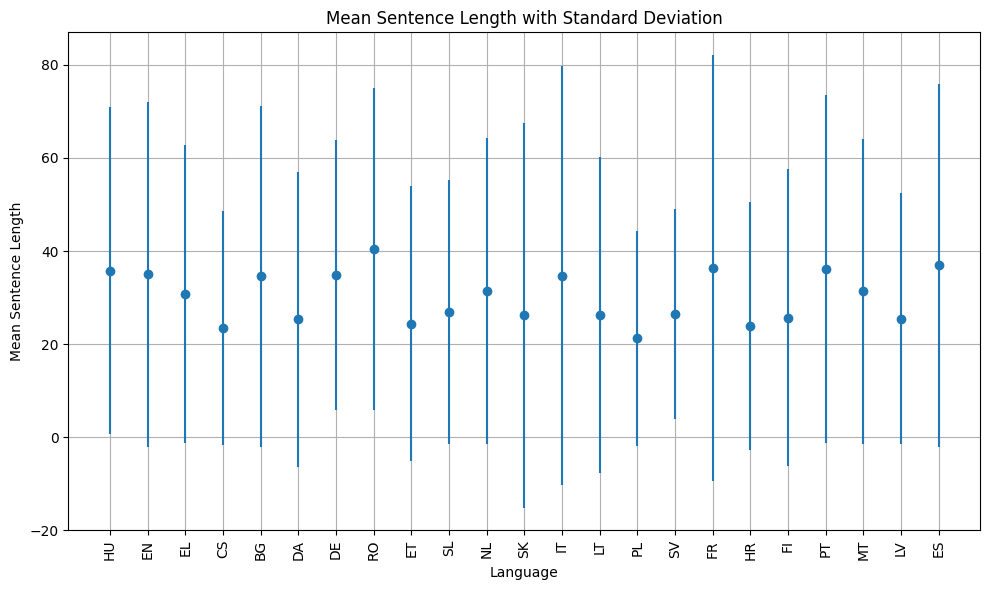

In [14]:
import nltk
import numpy as np
import matplotlib.pyplot as plt

# List of file paths
file_paths = [
    "/kaggle/input/eu-23-food-safety/HU.txt",
    "/kaggle/input/eu-23-food-safety/EN.txt",
    "/kaggle/input/eu-23-food-safety/EL.txt",
    "/kaggle/input/eu-23-food-safety/CS.txt",
    "/kaggle/input/eu-23-food-safety/BG.txt",
    "/kaggle/input/eu-23-food-safety/DA.txt",
    "/kaggle/input/eu-23-food-safety/DE.txt",
    "/kaggle/input/eu-23-food-safety/RO.txt",
    "/kaggle/input/eu-23-food-safety/ET.txt",
    "/kaggle/input/eu-23-food-safety/SL.txt",
    "/kaggle/input/eu-23-food-safety/NL.txt",
    "/kaggle/input/eu-23-food-safety/SK.txt",
    "/kaggle/input/eu-23-food-safety/IT.txt",
    "/kaggle/input/eu-23-food-safety/LT.txt",
    "/kaggle/input/eu-23-food-safety/PL.txt",
    "/kaggle/input/eu-23-food-safety/SV.txt",
    "/kaggle/input/eu-23-food-safety/FR.txt",
    "/kaggle/input/eu-23-food-safety/HR.txt",
    "/kaggle/input/eu-23-food-safety/FI.txt",
    "/kaggle/input/eu-23-food-safety/PT.txt",
    "/kaggle/input/eu-23-food-safety/MT.txt",
    "/kaggle/input/eu-23-food-safety/LV.txt",
    "/kaggle/input/eu-23-food-safety/ES.txt"
]

# Initialize lists for storing statistics
mean_lengths = []
std_lengths = []

# Process each file
for file_path in file_paths:
    try:
        with open(file_path, "r") as file:
            file_contents = file.read()
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
        continue
    
    # Tokenize sentences
    sentences = nltk.sent_tokenize(file_contents)
    
    # Calculate sentence lengths
    sentence_lengths = [len(nltk.word_tokenize(sentence)) for sentence in sentences]
    
    # Calculate descriptive statistics
    mean_length = np.mean(sentence_lengths)
    std_length = np.std(sentence_lengths)
    
    # Store statistics
    mean_lengths.append(mean_length)
    std_lengths.append(std_length)
    
    # Print statistics
    print(f"File: {file_path}")
    print("Mean Sentence Length:", mean_length)
    print("Sentence Length Standard Deviation:", std_length)
    print()

# Create the plot
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(file_paths)), mean_lengths, yerr=std_lengths, fmt='o')
plt.xticks(range(len(file_paths)), [file_path.split('/')[-1].split('.')[0] for file_path in file_paths], rotation=90)
plt.xlabel('Language')
plt.ylabel('Mean Sentence Length')
plt.title('Mean Sentence Length with Standard Deviation')
plt.grid(True)
plt.tight_layout()
plt.show()



# Zipf's law

Zipf's distribution parameters for /kaggle/input/bg-bleu-and-ter/BG GOOGLE.csv: k=172.80, β=-0.77
Zipf distribution parameter: k = 450.8716406522831 , beta = 0.9705402558569154
Zipf's distribution parameters for /kaggle/input/cs-bleu-and-ter/CS GOOGLE.csv: k=215.79, β=-0.79
Zipf distribution parameter: k = 161.57600959549916 , beta = 0.7023064723810826
Zipf's distribution parameters for /kaggle/input/da-bleu-and-ter/DA GOOGLE.csv: k=226.61, β=-0.81
Zipf distribution parameter: k = 269.05479200399645 , beta = 0.7797188271308637
Zipf's distribution parameters for /kaggle/input/de-bleu-and-ter/DE GOOGLE.csv: k=140.95, β=-0.76
Zipf distribution parameter: k = 193.40272471509635 , beta = 0.78053944113758
Zipf's distribution parameters for /kaggle/input/el-bleu-and-ter/EL GOOGLE.csv: k=412.99, β=-0.90
Zipf distribution parameter: k = 399.8514019745437 , beta = 0.7884216392557201
Zipf's distribution parameters for /kaggle/input/es-bleu-and-ter/ES GOOGLE.csv: k=350.20, β=-0.88
Zipf distributio

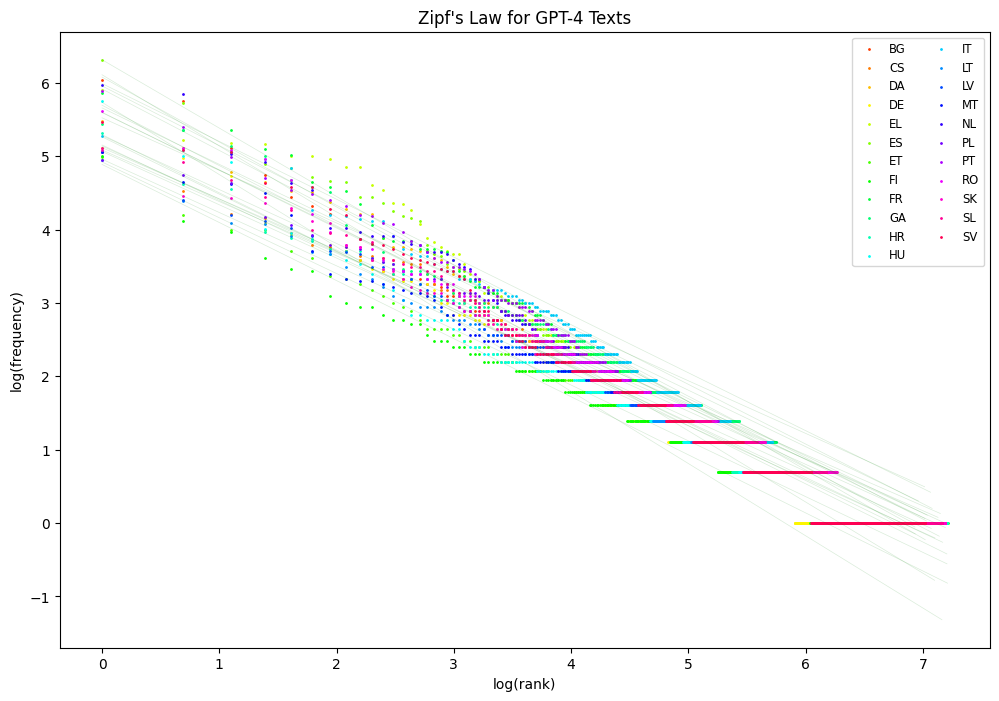

In [16]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit
import seaborn as sns

# Define function to clean and process text
def process_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    words = text.split()
    return words


def plot_zipf(file_path, color):
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return

    text = ' '.join(df[0])
    words = process_text(text)

    # Calculate word frequencies and sort by frequency
    word_freq = pd.Series(words).value_counts().sort_values(ascending=False)

    # Plot Zipf's law
    rank = np.arange(1, len(word_freq)+1)
    log_rank = np.log(rank)
    log_freq = np.log(word_freq)

    plt.scatter(log_rank, log_freq, s=1, c=color, label=file_path.split('/')[-1].split(' ')[0]) 

    slope, intercept, r_value, p_value, std_err = linregress(log_rank, log_freq)
    print(f"Zipf's distribution parameters for {file_path}: k={np.exp(intercept):.2f}, β={slope:.2f}")

    # Fit the Zipf's law distribution
    popt, pcov = curve_fit(zipf_law, rank, word_freq)
    k = popt[0]
    beta = popt[1]
    print('Zipf distribution parameter: k =', k, ', beta =', beta)

    # Plot the fit with thin, dim red line
    plt.plot(np.log(rank), np.log(zipf_law(rank, k, beta)), c='green', linewidth=0.5, alpha=0.15)


# Define the function form of the Zipf's law
def zipf_law(N, k, beta):
    return k * np.power(N, -beta)

files = [
'/kaggle/input/bg-bleu-and-ter/BG GOOGLE.csv',
'/kaggle/input/cs-bleu-and-ter/CS GOOGLE.csv',
'/kaggle/input/da-bleu-and-ter/DA GOOGLE.csv',
'/kaggle/input/de-bleu-and-ter/DE GOOGLE.csv',
'/kaggle/input/el-bleu-and-ter/EL GOOGLE.csv',
'/kaggle/input/es-bleu-and-ter/ES GOOGLE.csv',
'/kaggle/input/et-bleu-and-ter/ET GOOGLE.csv',
'/kaggle/input/fi-bleu-and-ter/FI GOOGLE.csv',
'/kaggle/input/fr-bleu-and-ter/FR GOOGLE.csv',
'/kaggle/input/ga-bleu-and-ter/GA GOOGLE.csv',
'/kaggle/input/hr-bleu-and-ter/HR GOOGLE.csv',
'/kaggle/input/hu-bleu-and-ter/HU GOOGLE.csv',
'/kaggle/input/it-bleu-and-ter/IT GOOGLE.csv',
'/kaggle/input/lt-bleu-and-ter/LT GOOGLE.csv',
'/kaggle/input/lv-bleu-and-ter/LV GOOGLE.csv',
'/kaggle/input/mt-bleu-and-ter/MT GOOGLE.csv',
'/kaggle/input/nl-bleu-and-ter/NL GOOGLE.csv',
'/kaggle/input/pl-bleu-and-ter/PL GOOGLE.csv',
'/kaggle/input/pt-bleu-and-ter/PT GOOGLE.csv',
'/kaggle/input/ro-bleu-and-ter/RO GOOGLE.csv',
'/kaggle/input/sk-bleu-and-ter/SK GOOGLE.csv',
'/kaggle/input/sl-bleu-and-ter/SL GOOGLE.csv',
'/kaggle/input/sv-bleu-and-ter/SV GOOGLE.csv'
]

colors = sns.color_palette("hsv", len(files))

fig, ax = plt.subplots(figsize=(12, 8))

for file, color in zip(files, colors):
    plot_zipf(file, color)

ax.set_xlabel('log(rank)')
ax.set_ylabel('log(frequency)')
ax.set_title('Zipf\'s Law for GPT-4 Texts')
ax.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=2, fontsize='small') 

plt.show()

# Heaps' law

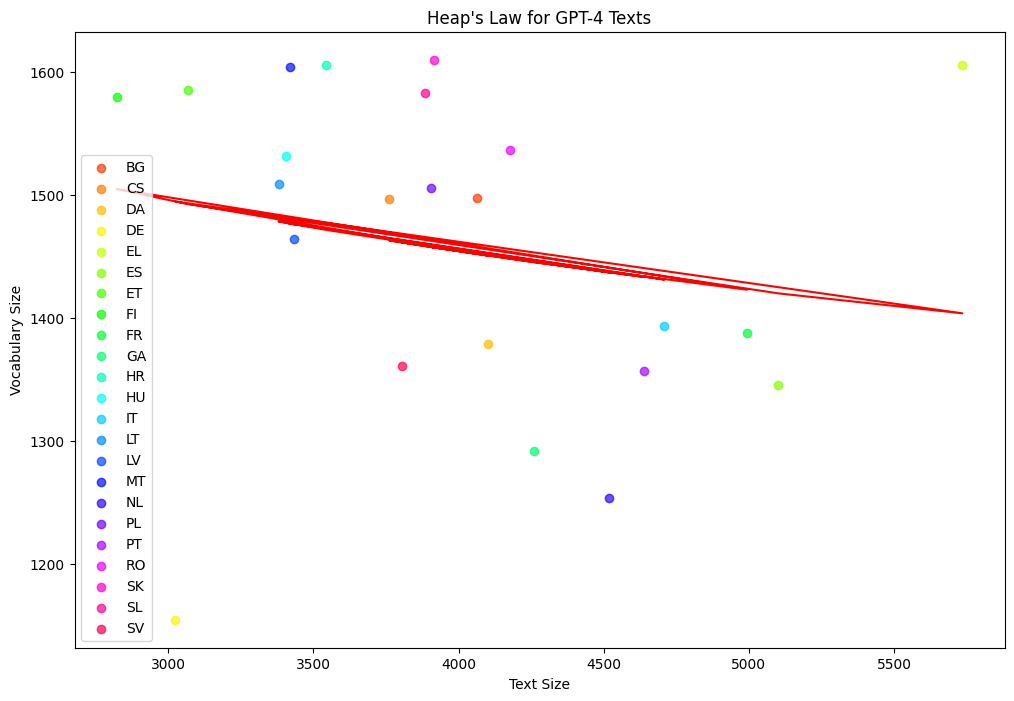

Heap's law parameters: K=3277.89, b=-0.10


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

def process_text(text):
    words = text.split()
    return words

files = [
'/kaggle/input/bg-bleu-and-ter/BG GPT-4.csv',
'/kaggle/input/cs-bleu-and-ter/CS GPT-4.csv',
'/kaggle/input/da-bleu-and-ter/DA GPT-4.csv',
'/kaggle/input/de-bleu-and-ter/DE GPT-4.csv',
'/kaggle/input/el-bleu-and-ter/EL GPT-4.csv',
'/kaggle/input/es-bleu-and-ter/ES GPT-4.csv',
'/kaggle/input/et-bleu-and-ter/ET GPT-4.csv',
'/kaggle/input/fi-bleu-and-ter/FI GPT-4.csv',
'/kaggle/input/fr-bleu-and-ter/FR GPT-4.csv',
'/kaggle/input/ga-bleu-and-ter/GA GPT-4.csv',
'/kaggle/input/hr-bleu-and-ter/HR GPT-4.csv',
'/kaggle/input/hu-bleu-and-ter/HU GPT-4.csv',
'/kaggle/input/it-bleu-and-ter/IT GPT-4.csv',
'/kaggle/input/lt-bleu-and-ter/LT GPT-4.csv',
'/kaggle/input/lv-bleu-and-ter/LV GPT-4.csv',
'/kaggle/input/mt-bleu-and-ter/MT GPT-4.csv',
'/kaggle/input/nl-bleu-and-ter/NL GPT-4.csv',
'/kaggle/input/pl-bleu-and-ter/PL GPT-4.csv',
'/kaggle/input/pt-bleu-and-ter/PT GPT-4.csv',
'/kaggle/input/ro-bleu-and-ter/RO GPT-4.csv',
'/kaggle/input/sk-bleu-and-ter/SK GPT-4.csv',
'/kaggle/input/sl-bleu-and-ter/SL GPT-4.csv',
'/kaggle/input/sv-bleu-and-ter/SV GPT-4.csv'
]

vocab_sizes = []
text_sizes = []
languages = []

for filename in files:
    try:
        df = pd.read_csv(filename, encoding='ISO-8859-1', header=None)
    except Exception as e:
        print(f"Error reading file {filename}: {e}")
        continue

    text = ' '.join(df[0])
    words = process_text(text)
    vocab_size = len(set(words))
    vocab_sizes.append(vocab_size)
    text_size = len(words)
    text_sizes.append(text_size)
    language = filename.split("/")[-1].split(" ")[0]
    languages.append(language)

# Generate a color palette with as many colors as there are languages
colors = sns.color_palette('hsv', len(languages))

# Now, plot Heap's law using a scatter plot with different colors for different languages
fig, ax = plt.subplots(figsize=(12, 8))

for i in range(len(languages)):
    ax.scatter(text_sizes[i], vocab_sizes[i], color=colors[i], label=languages[i], alpha=0.7)

ax.set_xlabel('Text Size')
ax.set_ylabel('Vocabulary Size')
ax.set_title("Heap's Law for GPT-4 Texts")
ax.legend()

# Fit Heap's Law using a linear regression in the log-log space
log_text_sizes = np.log(text_sizes)
log_vocab_sizes = np.log(vocab_sizes)
reg = LinearRegression().fit(log_text_sizes.reshape(-1, 1), log_vocab_sizes)
predicted_log_vocab_sizes = reg.predict(log_text_sizes.reshape(-1, 1))

# Plot the fitted line
ax.plot(text_sizes, np.exp(predicted_log_vocab_sizes), color='red')
plt.show()

# Print the Heap's law parameters
print(f"Heap's law parameters: K={np.exp(reg.intercept_):.2f}, b={reg.coef_[0]:.2f}")


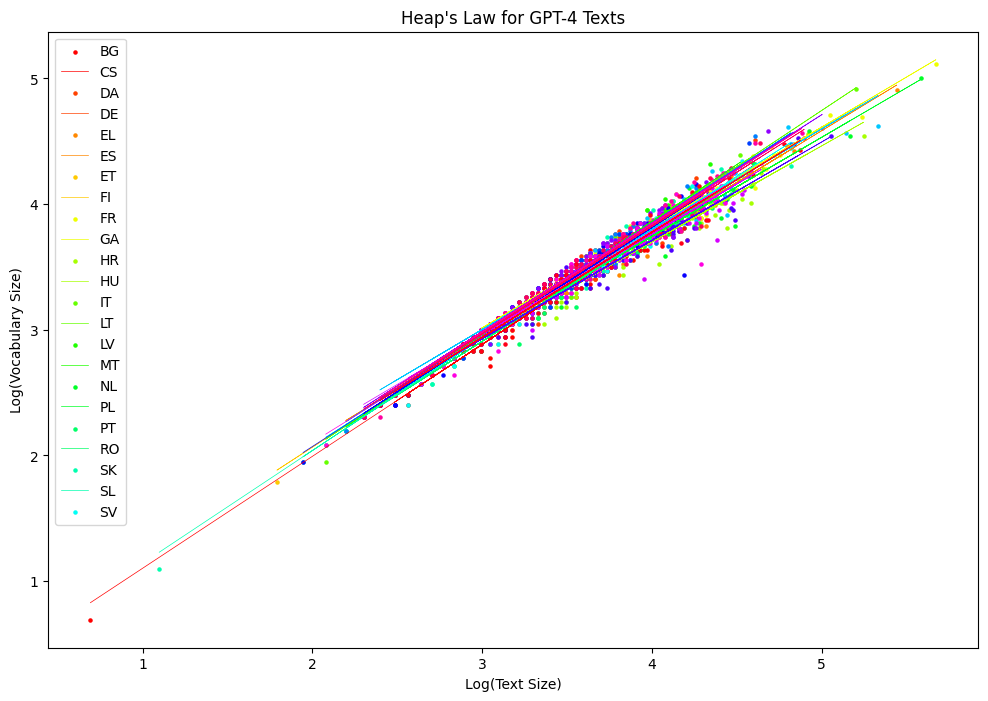

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def process_text(text):
    words = text.split()
    return words

files = [
    '/kaggle/input/bg-bleu-and-ter/BG GPT-4.csv',
    '/kaggle/input/cs-bleu-and-ter/CS GPT-4.csv',
    '/kaggle/input/da-bleu-and-ter/DA GPT-4.csv',
    '/kaggle/input/de-bleu-and-ter/DE GPT-4.csv',
    '/kaggle/input/el-bleu-and-ter/EL GPT-4.csv',
    '/kaggle/input/es-bleu-and-ter/ES GPT-4.csv',
    '/kaggle/input/et-bleu-and-ter/ET GPT-4.csv',
    '/kaggle/input/fi-bleu-and-ter/FI GPT-4.csv',
    '/kaggle/input/fr-bleu-and-ter/FR GPT-4.csv',
    '/kaggle/input/ga-bleu-and-ter/GA GPT-4.csv',
    '/kaggle/input/hr-bleu-and-ter/HR GPT-4.csv',
    '/kaggle/input/hu-bleu-and-ter/HU GPT-4.csv',
    '/kaggle/input/it-bleu-and-ter/IT GPT-4.csv',
    '/kaggle/input/lt-bleu-and-ter/LT GPT-4.csv',
    '/kaggle/input/lv-bleu-and-ter/LV GPT-4.csv',
    '/kaggle/input/mt-bleu-and-ter/MT GPT-4.csv',
    '/kaggle/input/nl-bleu-and-ter/NL GPT-4.csv',
    '/kaggle/input/pl-bleu-and-ter/PL GPT-4.csv',
    '/kaggle/input/pt-bleu-and-ter/PT GPT-4.csv',
    '/kaggle/input/ro-bleu-and-ter/RO GPT-4.csv',
    '/kaggle/input/sk-bleu-and-ter/SK GPT-4.csv',
    '/kaggle/input/sl-bleu-and-ter/SL GPT-4.csv',
    '/kaggle/input/sv-bleu-and-ter/SV GPT-4.csv'
]

languages = ['BG', 'CS', 'DA', 'DE', 'EL', 'ES', 'ET', 'FI', 'FR', 'GA', 'HR', 'HU', 'IT', 'LT', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SK', 'SL', 'SV']
colors = plt.cm.hsv(np.linspace(0, 1, len(files)))

fig, ax = plt.subplots(figsize=(12, 8))

for file_path, language, color in zip(files, languages, colors):
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        continue

    text_sizes = []
    vocab_sizes = []
    for text in df[0]:
        words = process_text(text)
        vocab_size = len(set(words))
        text_size = len(words)

        text_sizes.append(np.log(text_size))
        vocab_sizes.append(np.log(vocab_size))

    reg = LinearRegression().fit(np.array(text_sizes).reshape(-1, 1), np.array(vocab_sizes))
    
    ax.scatter(text_sizes, vocab_sizes, color=color, s=5)
    ax.plot(text_sizes, reg.predict(np.array(text_sizes).reshape(-1, 1)), color=color, linewidth=0.5)

ax.set_xlabel('Log(Text Size)')
ax.set_ylabel('Log(Vocabulary Size)')
ax.set_title("Heap's Law for GPT-4 Texts")
ax.legend(languages)

plt.show() 


In [ ]:
def plot_zipf(file_path, color):
    # Try reading the CSV file with 'ISO-8859-1' encoding and concatenate all text into a single string
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return

    text = ' '.join(df[0])

    # Process the text
    words = process_text(text)

    # Calculate word frequencies and sort by frequency
    word_freq = pd.Series(words).value_counts().sort_values(ascending=False)

    # Plot Zipf's law
    rank = np.arange(1, len(word_freq)+1)
    plt.scatter(np.log(rank), np.log(word_freq), s=1, c=color, label=file_path)


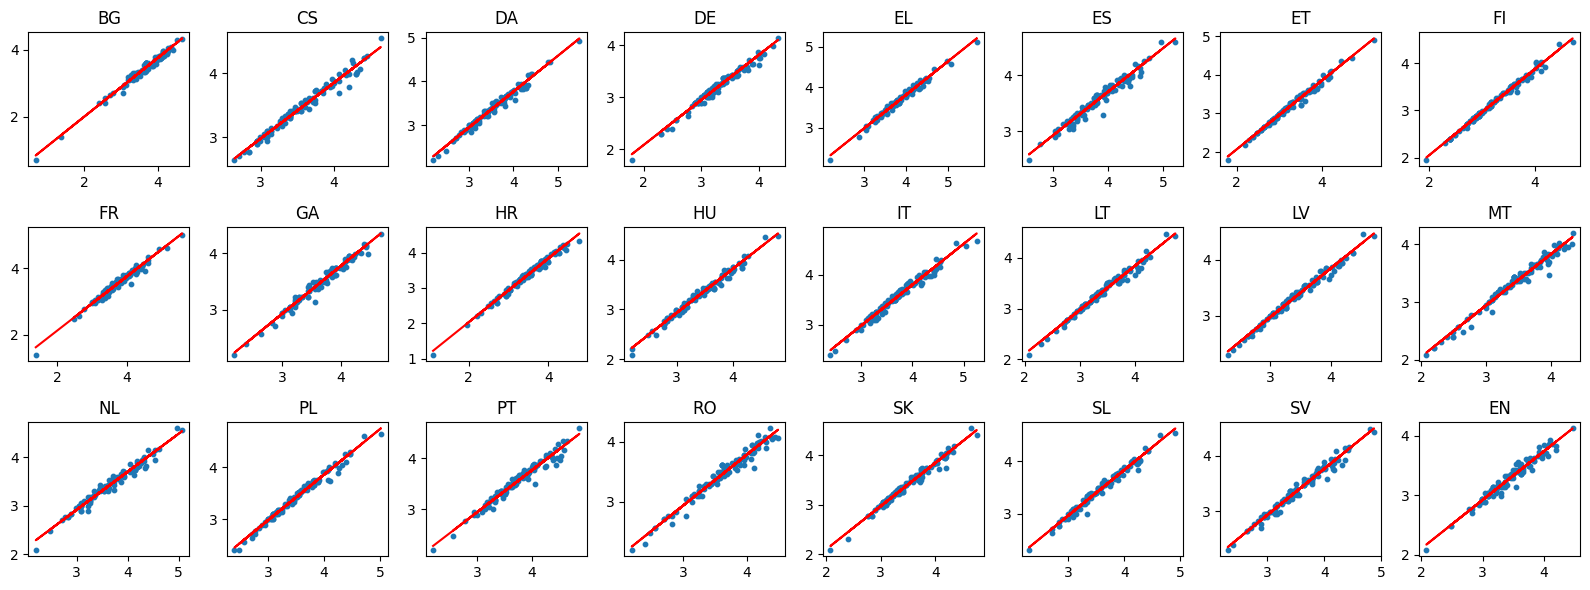

For file /kaggle/input/bg-bleu-and-ter/BG GOOGLE.csv: K = 1.25, b = 0.88
For file /kaggle/input/cs-bleu-and-ter/CS GOOGLE.csv: K = 1.45, b = 0.87
For file /kaggle/input/da-bleu-and-ter/DA GOOGLE.csv: K = 1.61, b = 0.82
For file /kaggle/input/de-bleu-and-ter/DE GOOGLE.csv: K = 1.43, b = 0.86
For file /kaggle/input/el-bleu-and-ter/EL GOOGLE.csv: K = 1.65, b = 0.83
For file /kaggle/input/es-bleu-and-ter/ES GOOGLE.csv: K = 1.82, b = 0.78
For file /kaggle/input/et-bleu-and-ter/ET GOOGLE.csv: K = 1.34, b = 0.89
For file /kaggle/input/fi-bleu-and-ter/FI GOOGLE.csv: K = 1.26, b = 0.91
For file /kaggle/input/fr-bleu-and-ter/FR GOOGLE.csv: K = 1.65, b = 0.81
For file /kaggle/input/ga-bleu-and-ter/GA GOOGLE.csv: K = 1.46, b = 0.85
For file /kaggle/input/hr-bleu-and-ter/HR GOOGLE.csv: K = 1.27, b = 0.90
For file /kaggle/input/hu-bleu-and-ter/HU GOOGLE.csv: K = 1.34, b = 0.88
For file /kaggle/input/it-bleu-and-ter/IT GOOGLE.csv: K = 1.73, b = 0.81
For file /kaggle/input/lt-bleu-and-ter/LT GOOGLE.cs

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def process_text(text):
    words = text.split()
    return words

files = [
'/kaggle/input/bg-bleu-and-ter/BG GOOGLE.csv',
'/kaggle/input/cs-bleu-and-ter/CS GOOGLE.csv',
'/kaggle/input/da-bleu-and-ter/DA GOOGLE.csv',
'/kaggle/input/de-bleu-and-ter/DE GOOGLE.csv',
'/kaggle/input/el-bleu-and-ter/EL GOOGLE.csv',
'/kaggle/input/es-bleu-and-ter/ES GOOGLE.csv',
'/kaggle/input/et-bleu-and-ter/ET GOOGLE.csv',
'/kaggle/input/fi-bleu-and-ter/FI GOOGLE.csv',
'/kaggle/input/fr-bleu-and-ter/FR GOOGLE.csv',
'/kaggle/input/ga-bleu-and-ter/GA GOOGLE.csv',
'/kaggle/input/hr-bleu-and-ter/HR GOOGLE.csv',
'/kaggle/input/hu-bleu-and-ter/HU GOOGLE.csv',
'/kaggle/input/it-bleu-and-ter/IT GOOGLE.csv',
'/kaggle/input/lt-bleu-and-ter/LT GOOGLE.csv',
'/kaggle/input/lv-bleu-and-ter/LV GOOGLE.csv',
'/kaggle/input/mt-bleu-and-ter/MT GOOGLE.csv',
'/kaggle/input/nl-bleu-and-ter/NL GOOGLE.csv',
'/kaggle/input/pl-bleu-and-ter/PL GOOGLE.csv',
'/kaggle/input/pt-bleu-and-ter/PT GOOGLE.csv',
'/kaggle/input/ro-bleu-and-ter/RO GOOGLE.csv',
'/kaggle/input/sk-bleu-and-ter/SK GOOGLE.csv',
'/kaggle/input/sl-bleu-and-ter/SL GOOGLE.csv',
'/kaggle/input/sv-bleu-and-ter/SV GOOGLE.csv',
'/kaggle/input/en-google/EN GOOGLE.csv'
]

heaps_params = {}

# create grid of subplots with 3 rows and 8 columns for up to 24 images
fig, axs = plt.subplots(3, 8, figsize=(16,6))  # adjust the figure size as needed
axs = axs.flatten()  # flatten the grid to easily iterate over it

for i, file_path in enumerate(files):
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        continue

    text_sizes = []
    vocab_sizes = []
    for text in df[0]:
        words = process_text(text)
        vocab_size = len(set(words))
        text_size = len(words)

        text_sizes.append(np.log(text_size))
        vocab_sizes.append(np.log(vocab_size))

    reg = LinearRegression().fit(np.array(text_sizes).reshape(-1, 1), np.array(vocab_sizes))
    heaps_params[file_path] = {'K': np.exp(reg.intercept_), 'b': reg.coef_[0]}

    # Plot Heap's Law in the corresponding subplot
    axs[i].scatter(text_sizes, vocab_sizes, s=10)  # reduce size of scatter points
    axs[i].plot(text_sizes, reg.predict(np.array(text_sizes).reshape(-1, 1)), color='red')
    
    # Extract language name from filename and use it to set the title
    language_name = file_path.split('/')[-1].split(' ')[0]
    axs[i].set_title(f"{language_name}")

# Remove unused subplots
for j in range(i+1, 24):
    fig.delaxes(axs[j])

plt.tight_layout()  # ensure the subplots do not overlap
plt.show()

# Print the Heap's law parameters
for file_path, params in heaps_params.items():
    print(f"For file {file_path}: K = {params['K']:.2f}, b = {params['b']:.2f}")


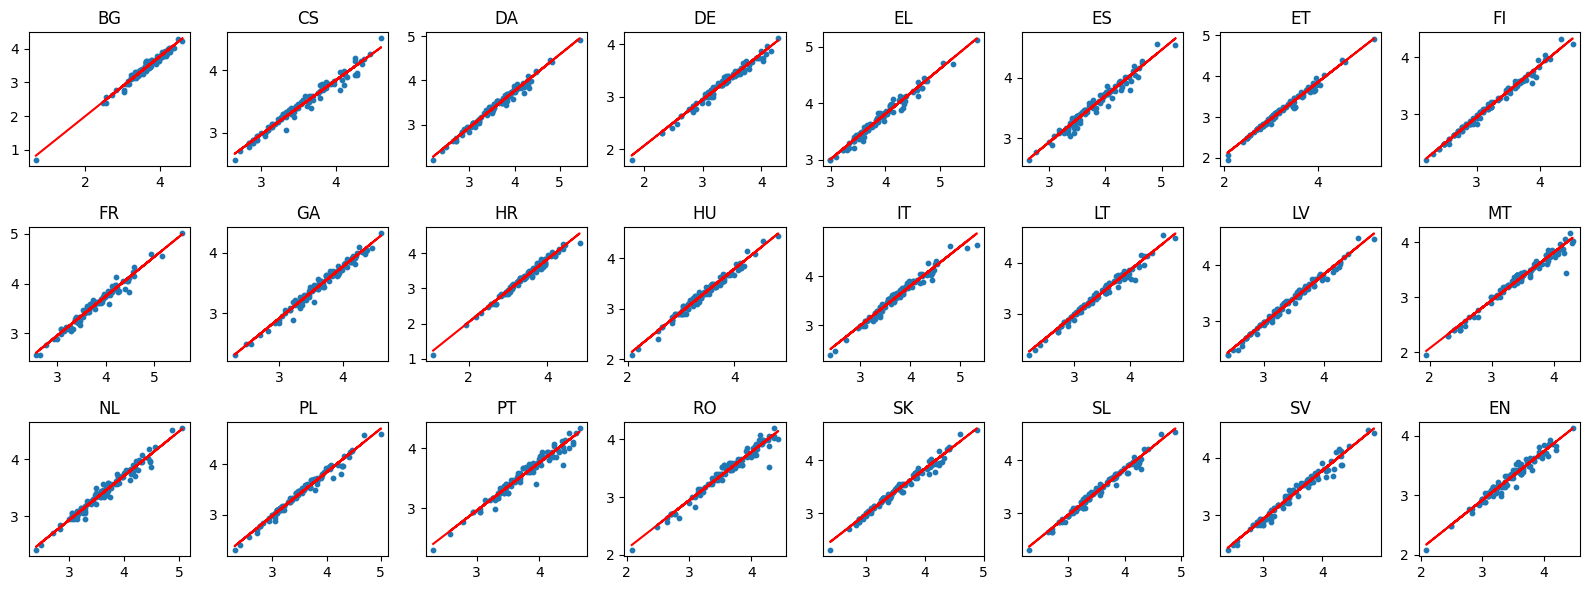

For file /kaggle/input/bg-bleu-and-ter/BG GPT-4.csv: K = 1.24, b = 0.89
For file /kaggle/input/cs-bleu-and-ter/CS GPT-4.csv: K = 1.47, b = 0.86
For file /kaggle/input/da-bleu-and-ter/DA GPT-4.csv: K = 1.60, b = 0.82
For file /kaggle/input/de-bleu-and-ter/DE GPT-4.csv: K = 1.36, b = 0.88
For file /kaggle/input/el-bleu-and-ter/EL GPT-4.csv: K = 1.86, b = 0.80
For file /kaggle/input/es-bleu-and-ter/ES GPT-4.csv: K = 1.92, b = 0.76
For file /kaggle/input/et-bleu-and-ter/ET GPT-4.csv: K = 1.31, b = 0.90
For file /kaggle/input/fi-bleu-and-ter/FI GPT-4.csv: K = 1.26, b = 0.91
For file /kaggle/input/fr-bleu-and-ter/FR GPT-4.csv: K = 1.80, b = 0.79
For file /kaggle/input/ga-bleu-and-ter/GA GPT-4.csv: K = 1.40, b = 0.86
For file /kaggle/input/hr-bleu-and-ter/HR GPT-4.csv: K = 1.28, b = 0.90
For file /kaggle/input/hu-bleu-and-ter/HU GPT-4.csv: K = 1.44, b = 0.86
For file /kaggle/input/it-bleu-and-ter/IT GPT-4.csv: K = 1.84, b = 0.80
For file /kaggle/input/lt-bleu-and-ter/LT GPT-4.csv: K = 1.41, b

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def process_text(text):
    words = text.split()
    return words

files = [
    '/kaggle/input/bg-bleu-and-ter/BG GPT-4.csv',
    '/kaggle/input/cs-bleu-and-ter/CS GPT-4.csv',
    '/kaggle/input/da-bleu-and-ter/DA GPT-4.csv',
    '/kaggle/input/de-bleu-and-ter/DE GPT-4.csv',
    '/kaggle/input/el-bleu-and-ter/EL GPT-4.csv',
    '/kaggle/input/es-bleu-and-ter/ES GPT-4.csv',
    '/kaggle/input/et-bleu-and-ter/ET GPT-4.csv',
    '/kaggle/input/fi-bleu-and-ter/FI GPT-4.csv',
    '/kaggle/input/fr-bleu-and-ter/FR GPT-4.csv',
    '/kaggle/input/ga-bleu-and-ter/GA GPT-4.csv',
    '/kaggle/input/hr-bleu-and-ter/HR GPT-4.csv',
    '/kaggle/input/hu-bleu-and-ter/HU GPT-4.csv',
    '/kaggle/input/it-bleu-and-ter/IT GPT-4.csv',
    '/kaggle/input/lt-bleu-and-ter/LT GPT-4.csv',
    '/kaggle/input/lv-bleu-and-ter/LV GPT-4.csv',
    '/kaggle/input/mt-bleu-and-ter/MT GPT-4.csv',
    '/kaggle/input/nl-bleu-and-ter/NL GPT-4.csv',
    '/kaggle/input/pl-bleu-and-ter/PL GPT-4.csv',
    '/kaggle/input/pt-bleu-and-ter/PT GPT-4.csv',
    '/kaggle/input/ro-bleu-and-ter/RO GPT-4.csv',
    '/kaggle/input/sk-bleu-and-ter/SK GPT-4.csv',
    '/kaggle/input/sl-bleu-and-ter/SL GPT-4.csv',
    '/kaggle/input/sv-bleu-and-ter/SV GPT-4.csv',
    '/kaggle/input/en-gpt-4/EN GPT-4.csv'
]

heaps_params = {}

# create grid of subplots with 3 rows and 8 columns for up to 24 images
fig, axs = plt.subplots(3, 8, figsize=(16,6))  # adjust the figure size as needed
axs = axs.flatten()  # flatten the grid to easily iterate over it

for i, file_path in enumerate(files):
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        continue

    text_sizes = []
    vocab_sizes = []
    for text in df[0]:
        words = process_text(text)
        vocab_size = len(set(words))
        text_size = len(words)

        text_sizes.append(np.log(text_size))
        vocab_sizes.append(np.log(vocab_size))

    reg = LinearRegression().fit(np.array(text_sizes).reshape(-1, 1), np.array(vocab_sizes))
    heaps_params[file_path] = {'K': np.exp(reg.intercept_), 'b': reg.coef_[0]}

    # Plot Heap's Law in the corresponding subplot
    axs[i].scatter(text_sizes, vocab_sizes, s=10)  # reduce size of scatter points
    axs[i].plot(text_sizes, reg.predict(np.array(text_sizes).reshape(-1, 1)), color='red')
    
    # Extract language name from filename and use it to set the title
    language_name = file_path.split('/')[-1].split(' ')[0]
    axs[i].set_title(f"{language_name}")

# Remove unused subplots
for j in range(i+1, 24):
    fig.delaxes(axs[j])

plt.tight_layout()  # ensure the subplots do not overlap
plt.show()

# Print the Heap's law parameters
for file_path, params in heaps_params.items():
    print(f"For file {file_path}: K = {params['K']:.2f}, b = {params['b']:.2f}")


# Semantic similarity

In [ ]:
pip install sentence-transformers

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import statistics

# Load CSV files
english_df = pd.read_csv('/kaggle/input/english-source-text/EN-BG.csv', encoding='latin1', header=None)
german_df = pd.read_csv('/kaggle/input/bg-bleu-and-ter/BG GPT-4.csv', encoding='latin1', header=None)

# Initialize multilingual model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Make sure that both dataframes are of the same length
assert len(english_df) == len(german_df), "The CSV files must have the same number of sentences"

similarities = []

for eng_sentence, ger_sentence in zip(english_df[0], german_df[0]):
    # Encode sentences to get their embeddings
    english_embedding = model.encode(eng_sentence, convert_to_tensor=True)
    german_embedding = model.encode(ger_sentence, convert_to_tensor=True)

    # Compute cosine similarity between English and German embeddings
    cosine_similarity = util.pytorch_cos_sim(english_embedding, german_embedding)

    similarities.append(cosine_similarity.item())

# Print all the similarity scores
for i, similarity in enumerate(similarities):
    print(f"Cosine similarity for sentence pair {i + 1}:", similarity)

# Calculate and print average similarity and standard deviation
average_similarity = statistics.mean(similarities)
std_dev_similarity = statistics.stdev(similarities)

print(f"Average similarity: {average_similarity}")
print(f"Standard deviation of similarity: {std_dev_similarity}")

# Save Zipf's data 

In [6]:
import pandas as pd

data_chatgpt = {
    'Language': ['BG', 'CS', 'DA', 'DE', 'EL', 'ES', 'ET', 'FI', 'FR', 'GA', 'HR', 'HU', 'IT', 'LT', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SK', 'SL', 'SV'],
    'k_ChatGPT': [434.1646672762423, 167.3126245388713, 273.89546757089687, 189.60502574536258, 447.5986989653837, 560.9803153655973, 130.4320753565417, 127.60295719668238, 375.4400859738705, 296.68353739952556, 192.4613674518425, 316.1769380861692, 256.2705256313875, 149.87460334063306, 162.2497471942643, 207.92998753952259, 445.6705997697947, 159.8559261249805, 379.5730870455191, 280.47306771323974, 182.72049144277995, 196.3075835891873, 250.99076156298003],
    'beta_ChatGPT': [0.9549703795369535, 0.7163095856625264, 0.7803283681325277, 0.7676058732391952, 0.7967449997004638, 0.936942083696458, 0.747811153401898, 0.7961679963376117, 0.796465912982605, 0.7840228555701859, 0.7855716510942133, 0.9990603648035499, 0.7220366794101989, 0.7436258789921705, 0.7373521832691871, 0.8389432291228756, 0.896050264972598, 0.6877694950115097, 0.8470229075751533, 0.8120987664347261, 0.7346635681909061, 0.7408720459908157, 0.7799780206153488]
}

data_google = {
    'Language': ['BG', 'CS', 'DA', 'DE', 'EL', 'ES', 'ET', 'FI', 'FR', 'GA', 'HR', 'HU', 'IT', 'LT', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SK', 'SL', 'SV'],
    'k_Google': [450.8716406522831, 161.57600959549916, 269.05479200399645, 193.40272471509635, 399.8514019745437, 553.3972654017504, 137.2748863054568, 132.77221028038588, 387.07767560389436, 286.95157405813336, 199.36261979098308, 309.5363971591283, 250.71340331362228, 142.60475668643335, 158.43251088132334, 173.11598227019414, 436.5941832397788, 166.8662327919379, 371.30547522781814, 297.55129178873176, 170.65082414269907, 196.50236311051398, 270.40453400081094],
    'beta_Google': [0.9705402558569154, 0.7023064723810826, 0.7797188271308637, 0.78053944113758, 0.7884216392557201, 0.9319573945930072, 0.7601138592851319, 0.7916065192098185, 0.813445019166936, 0.7695183747068565, 0.7932885535678182, 0.9846006581005768, 0.7168975023490336, 0.7267833844892065, 0.726564737157098, 0.7554097887896503, 0.884583239230967, 0.6974754634092794, 0.8374576766394562, 0.8227270149500719, 0.7230751100312752, 0.7345175235037431, 0.788993585004167]
}

df_chatgpt = pd.DataFrame(data_chatgpt)
df_google = pd.DataFrame(data_google)

# Merging the dataframes
merged_df = pd.merge(df_chatgpt, df_google, on='Language')

# Saving the combined table
merged_df.to_csv('zipf_parameters_combined.csv', index=False)


# Save Heaps' data

In [5]:
import pandas as pd

data = {
    'Language': ['BG', 'CS', 'DA', 'DE', 'EL', 'ES', 'ET', 'FI', 'FR', 'GA', 'HR', 'HU', 'IT', 'LT', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SK', 'SL', 'SV'],
    'K': [1.24, 1.47, 1.60, 1.36, 1.86, 1.92, 1.31, 1.26, 1.80, 1.40, 1.28, 1.44, 1.84, 1.41, 1.42, 1.39, 1.78, 1.48, 1.77, 1.53, 1.49, 1.48, 1.54],
    'b': [0.89, 0.86, 0.82, 0.88, 0.80, 0.76, 0.90, 0.91, 0.79, 0.86, 0.90, 0.86, 0.80, 0.88, 0.87, 0.87, 0.78, 0.86, 0.80, 0.84, 0.86, 0.86, 0.84]
}

df = pd.DataFrame(data)

# Adding Google data
google_data = {
    'Language': ['BG', 'CS', 'DA', 'DE', 'EL', 'ES', 'ET', 'FI', 'FR', 'GA', 'HR', 'HU', 'IT', 'LT', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SK', 'SL', 'SV'],
    'K': [1.25, 1.45, 1.61, 1.43, 1.65, 1.82, 1.34, 1.26, 1.65, 1.46, 1.27, 1.34, 1.73, 1.42, 1.44, 1.31, 1.75, 1.40, 1.60, 1.48, 1.40, 1.42, 1.57],
    'b': [0.88, 0.87, 0.82, 0.86, 0.83, 0.78, 0.89, 0.91, 0.81, 0.85, 0.90, 0.88, 0.81, 0.87, 0.87, 0.89, 0.78, 0.88, 0.83, 0.85, 0.88, 0.87, 0.83]
}

google_df = pd.DataFrame(google_data)

# Merging the dataframes
merged_df = pd.merge(df, google_df, on='Language', suffixes=('_ChatGPT', '_Google'))

# Saving the combined table
merged_df.to_csv('heaps_parameters_combined.csv', index=False)


# Save BLEU and TER score data

In [7]:
import pandas as pd

data = {
    'Language': ['BG', 'CS', 'DA', 'DE', 'EL', 'ES', 'ET', 'FI', 'FR', 'GA', 'HR', 'HU', 'IT', 'LT', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SK', 'SL', 'SV'],
    'GPT-4 TER': [0.5270677265499755, 0.594493755593295, 0.6397094422299533, 0.6410271162937023, 0.5684802993414315, 0.46669970080997364, 0.728472756763937, 0.7727098720683202, 0.4625477817117139, 0.6672659665807431, 0.6313119392128338, 0.7498069588504062, 0.5559760518464543, 0.7253811416350948, 0.6632046580377761, 0.582744226876446, 0.6599612583497075, 0.5856743526069443, 0.6010888469198585, 0.5141427397346314, 0.6226765770922392, 0.5643051872854836, 0.5988006049695666],
    'Google TER': [0.42636318553010655, 0.4984824069310532, 0.5481737518975365, 0.651540855576157, 0.4927294511034014, 0.42229231198306777, 0.6548367900656311, 0.6560834170962544, 0.4185314584228035, 0.42390770557598884, 0.5090407081718604, 0.6211927975567687, 0.4466685255535362, 0.5919903355779551, 0.5570865175254172, 0.41196801404743, 0.4747923865592209, 0.4938308712210897, 0.504466206644082, 0.44497180899047634, 0.5356586593153266, 0.4954245185312556, 0.5071762821433211],
    'GPT-4 BLEU': [0.3552552641745027, 0.3786856095160625, 0.34987959430292204, 0.33899263763018944, 0.3457624015758899, 0.45559682465763834, 0.2419806208868027, 0.22125737205551035, 0.4476331337022162, 0.23132408751179293, 0.34190648683980307, 0.19680510491325962, 0.34757834573661894, 0.26698104555692925, 0.30697093676904547, 0.29645876056740195, 0.37952071460235337, 0.37442987711925857, 0.32879166378362984, 0.41356045978987416, 0.36745287751197664, 0.41276747754950555, 0.3472882242910872],
    'Google BLEU': [0.4793512819043544, 0.4970468414598795, 0.4425100546407971, 0.21904150654859214, 0.41737271054237335, 0.5211096449592018, 0.32798889539142034, 0.3385549820810842, 0.5028844001411947, 0.5300933010325921, 0.4276704466276146, 0.3533418012900072, 0.4746731812572519, 0.3853813084803176, 0.40286878526100195, 0.4917012977172347, 0.5196062512906129, 0.46917828641831183, 0.428199311252405, 0.5112418681567921, 0.4344215200427848, 0.48234384304433175, 0.4593710046955655]
}

df = pd.DataFrame(data)

# Displaying the data in a table
print(df)

# Saving the data as a CSV file
df.to_csv('Bleu_ter_scores.csv', index=False)


   Language  GPT-4 TER  Google TER  GPT-4 BLEU  Google BLEU
0        BG   0.527068    0.426363    0.355255     0.479351
1        CS   0.594494    0.498482    0.378686     0.497047
2        DA   0.639709    0.548174    0.349880     0.442510
3        DE   0.641027    0.651541    0.338993     0.219042
4        EL   0.568480    0.492729    0.345762     0.417373
5        ES   0.466700    0.422292    0.455597     0.521110
6        ET   0.728473    0.654837    0.241981     0.327989
7        FI   0.772710    0.656083    0.221257     0.338555
8        FR   0.462548    0.418531    0.447633     0.502884
9        GA   0.667266    0.423908    0.231324     0.530093
10       HR   0.631312    0.509041    0.341906     0.427670
11       HU   0.749807    0.621193    0.196805     0.353342
12       IT   0.555976    0.446669    0.347578     0.474673
13       LT   0.725381    0.591990    0.266981     0.385381
14       LV   0.663205    0.557087    0.306971     0.402869
15       MT   0.582744    0.411968    0.

# Save semantic similarity data

In [8]:
import pandas as pd

data = {
    'Pair': ['EN-BG', 'EN-CS', 'EN-DA', 'EN-DE', 'EN-EL', 'EN-ES', 'EN-ET', 'EN-FI', 'EN-FR', 'EN-GA', 'EN-HR', 'EN-HU', 'EN-IT', 'EN-LT', 'EN-LV', 'EN-MT', 'EN-NL', 'EN-PL', 'EN-PT', 'EN-RO', 'EN-SK', 'EN-SL', 'EN-SV'],
    'GPT-4 M': [-0.01886377641931176, 0.18355395495891572, 0.27272184474393724, 0.23628952212631701, 0.01912501299753785, 0.4108755077421665, 0.2696088569331914, 0.23317934915423394, 0.36178704991936683, 0.09192719672806561, 0.21379255263134836, 0.09428059305995702, 0.35572607062757017, 0.20549527257680894, 0.23769011456519365, 0.27536660637706517, 0.28458306517452003, 0.21664229298941792, 0.35362625474110243, 0.41530721209943294, 0.166675593694672, 0.17071732909418644, 0.31375762071460483],
    'GPT-4 SD': [0.08550964519179577, 0.10598616110356464, 0.11582722810660918, 0.1383165732752483, 0.08850208681100527, 0.10960070051953855, 0.12366275162974814, 0.12809951389022112, 0.1432615209722392, 0.09342634402756948, 0.1370819856892261, 0.10916948652885242, 0.13531771755889105, 0.11450145872867336, 0.10734261919911008, 0.15022641449878563, 0.13289045109617145, 0.1092107086181115, 0.12661753707559412, 0.1453570220873511, 0.11213264996909919, 0.11057160793078058, 0.11542347958564475],
    'GOOGLE M': [-0.02036993474815972, 0.17173463470768183, 0.2525963529199362, 0.24740474658086897, 0.018488764371722935, 0.4013621051609516, 0.2552128340117633, 0.24164580224081875, 0.3485443613678217, 0.06759178900159896, 0.21346850269008427, 0.08862494219094515, 0.35113108195364473, 0.19048085229471326, 0.23108031706884502, 0.24072768988087773, 0.3096549050696194, 0.21984045489691198, 0.3380228001996875, 0.4172422779351473, 0.157039436083287, 0.1719618687219918, 0.30960106579586866],
    'GOOGLE SD': [0.08624117882126699, 0.10565226820992371, 0.1138226352872946, 0.15277265608931542, 0.08855557480554234, 0.11732121192494306, 0.124386450099977, 0.12309521288809662, 0.1444097086594012, 0.07236507423707743, 0.13075251278777997, 0.10531221092192594, 0.12939773701939, 0.10717548855096407, 0.108262034773975, 0.12769118592300008, 0.14219516008120367, 0.11173196536249004, 0.13021964223151838, 0.13686705007412017, 0.11109778907444347, 0.11085805641342597, 0.11799428477282559],
    'REFERENCE M': [-0.020103996531106533, 0.16192090216092767, 0.25477318178862335, 0.20219228930771352, 0.018621744671836495, 0.3856158261746168, 0.25825115382671354, 0.2282283866032958, 0.32505809340626, 0.06599614081904293, 0.20299977122806012, 0.08905823442153632, 0.347077536508441, 0.19868103343993426, 0.2265856875665486, 0.23935147169977428, 0.2963413228839636, 0.21403040228411555, 0.32226141713559625, 0.4031134975701571, 0.14992246472276746, 0.1791511312685907, 0.289013146487996],
    'REFERENCE SD': [0.12341234274606068, 0.10703466436335395, 0.1159482505245859, 0.13125100802463457, 0.09241236449191836, 0.12251216845089294, 0.12772775662880012, 0.12632987411539534, 0.1346425920350589, 0.06791620326896682, 0.13105443979576664, 0.10614555690773764, 0.1296653059683265, 0.11740375191816857, 0.10687919482700879, 0.1253823881243174, 0.13676143205803634, 0.11454194757021464, 0.12541232845662809, 0.14079678600844095, 0.11630041736194754, 0.12116255128865548, 0.12296352336969119]
}

df = pd.DataFrame(data)

# Save the table as a CSV file
df.to_csv('semantic_similarity_data.csv', index=False)

# Display the table
print(df)


     Pair   GPT-4 M  GPT-4 SD  GOOGLE M  GOOGLE SD  REFERENCE M  REFERENCE SD
0   EN-BG -0.018864  0.085510 -0.020370   0.086241    -0.020104      0.123412
1   EN-CS  0.183554  0.105986  0.171735   0.105652     0.161921      0.107035
2   EN-DA  0.272722  0.115827  0.252596   0.113823     0.254773      0.115948
3   EN-DE  0.236290  0.138317  0.247405   0.152773     0.202192      0.131251
4   EN-EL  0.019125  0.088502  0.018489   0.088556     0.018622      0.092412
5   EN-ES  0.410876  0.109601  0.401362   0.117321     0.385616      0.122512
6   EN-ET  0.269609  0.123663  0.255213   0.124386     0.258251      0.127728
7   EN-FI  0.233179  0.128100  0.241646   0.123095     0.228228      0.126330
8   EN-FR  0.361787  0.143262  0.348544   0.144410     0.325058      0.134643
9   EN-GA  0.091927  0.093426  0.067592   0.072365     0.065996      0.067916
10  EN-HR  0.213793  0.137082  0.213469   0.130753     0.203000      0.131054
11  EN-HU  0.094281  0.109169  0.088625   0.105312     0.089058 

# Save sentence length data

In [1]:
import pandas as pd

data = [
    ['EN', 13314.00, 233.01, 140.50, 'DE', 13314.00, 264.29, 156.67],
    ['EN', 14274.00, 230.24, 140.65, 'HU', 14274.00, 253.45, 151.42],
    ['EN', 13878.00, 231.93, 140.41, 'IT', 13878.00, 262.54, 153.23],
    ['EN', 12976.00, 234.69, 147.38, 'FI', 12976.00, 249.91, 158.73],
    ['EN', 13175.00, 231.69, 141.07, 'NL', 13175.00, 261.87, 159.20],
    ['EN', 14209.00, 230.14, 140.22, 'PT', 14209.00, 259.79, 155.44],
    ['EN', 11463.00, 228.46, 140.77, 'MT', 11463.00, 242.45, 146.52],
    ['EN', 10637.00, 229.00, 141.59, 'BG', 10637.00, 250.55, 150.73],
    ['EN', 12966.00, 233.15, 145.23, 'DA', 12966.00, 237.65, 145.93],
    ['EN', 626.00, 245.43, 157.09, 'GA', 626.00, 272.01, 171.67],
    ['EN', 10247.00, 228.85, 139.51, 'RO', 10247.00, 261.73, 154.98],
    ['EN', 14639.00, 231.32, 139.45, 'FR', 14639.00, 267.18, 159.54],
    ['EN', 13422.00, 233.75, 145.58, 'SV', 13422.00, 234.80, 145.14],
    ['EN', 13347.00, 231.89, 140.21, 'ES', 13347.00, 268.39, 159.07],
    ['EN', 14253.00, 231.17, 141.90, 'PL', 14253.00, 251.41, 152.69],
    ['EN', 13276.00, 229.37, 141.72, 'EL', 13276.00, 265.53, 162.43],
    ['EN', 14241.00, 229.76, 141.80, 'ET', 14241.00, 217.04, 137.27],
    ['EN', 14649.00, 228.60, 141.65, 'SK', 14649.00, 225.63, 139.21],
    ['EN', 14110.00, 231.10, 142.59, 'SL', 14110.00, 216.83, 131.67],
    ['EN', 14041.00, 231.51, 142.44, 'LT', 14041.00, 222.05, 137.90],
    ['EN', 3782.00, 224.57, 145.51, 'HR', 3782.00, 218.10, 139.76],
    ['EN', 13721.00, 231.88, 143.14, 'CS', 13721.00, 221.16, 136.73],
    ['EN', 14163.00, 231.34, 141.19, 'LV', 14163.00, 220.59, 136.44]
]

df = pd.DataFrame(data, columns=['Source', 'Source_N', 'Source_Mean', 'Source_SD',
                                 'Target', 'Target_N', 'Target_Mean', 'Target_SD'])

# Display the table
# Save the table to a CSV file
df.to_csv('sentence_lengths.csv', index=False)


   Source  Source_N  Source_Mean  Source_SD Target  Target_N  Target_Mean  \
0      EN   13314.0       233.01     140.50     DE   13314.0       264.29   
1      EN   14274.0       230.24     140.65     HU   14274.0       253.45   
2      EN   13878.0       231.93     140.41     IT   13878.0       262.54   
3      EN   12976.0       234.69     147.38     FI   12976.0       249.91   
4      EN   13175.0       231.69     141.07     NL   13175.0       261.87   
5      EN   14209.0       230.14     140.22     PT   14209.0       259.79   
6      EN   11463.0       228.46     140.77     MT   11463.0       242.45   
7      EN   10637.0       229.00     141.59     BG   10637.0       250.55   
8      EN   12966.0       233.15     145.23     DA   12966.0       237.65   
9      EN     626.0       245.43     157.09     GA     626.0       272.01   
10     EN   10247.0       228.85     139.51     RO   10247.0       261.73   
11     EN   14639.0       231.32     139.45     FR   14639.0       267.18   